In [1]:
import pandas as pd
from io import StringIO
import pylab

df = pd.read_csv('googleplaystore_user_reviews.csv', encoding = "ISO-8859-1")
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [2]:
columnNames = list(df.head(0)) 
print(columnNames)

['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [3]:
df = df[pd.notnull(df['Translated_Review'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
App                       37427 non-null object
Translated_Review         37427 non-null object
Sentiment                 37427 non-null object
Sentiment_Polarity        37427 non-null float64
Sentiment_Subjectivity    37427 non-null float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [4]:
col = ['Sentiment', 'Translated_Review']
df = df[col]

df.columns = ['Sentiment', 'Translated_Review']
df.columns

Index(['Sentiment', 'Translated_Review'], dtype='object')

For this project, we need only two columns — “Sentiment” and “Translated_Review”.
We will remove missing values in “Translated_Review” column, and add a column encoding the product as an integer because categorical variables are often better represented by integers than strings.
We also create a couple of dictionaries for future use.

In [5]:
df['sentiment_id'] = df['Sentiment'].factorize()[0]
sentiment_id_df = df[['Sentiment', 'sentiment_id']].drop_duplicates().sort_values('sentiment_id')
sentiment_to_id = dict(sentiment_id_df.values)
id_to_sentiment = dict(sentiment_id_df[['sentiment_id', 'Sentiment']].values)
df.head()

,Sentiment,Translated_Review,sentiment_id
0,Positive,I like eat delicious food. That's I'm cooking ...,0
1,Positive,This help eating healthy exercise regular basis,0
3,Positive,Works great especially going grocery store,0
4,Positive,Best idea us,0
5,Positive,Best way,0


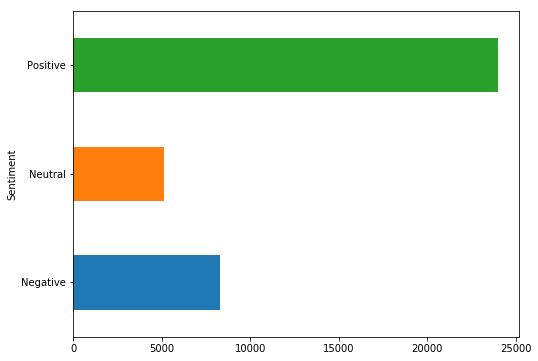

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Sentiment').Translated_Review.count().plot.barh(ylim=0)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(df['Translated_Review'], df['Sentiment'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)


In [14]:
from sklearn import metrics

# (clf.predict(count_vect.transform(["great app."])))
y_pred = clf.predict(count_vect.transform(X_test))
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Sentiment'].unique()))
print(metrics.accuracy_score(y_test, y_pred)*100)

              precision    recall  f1-score   support

    Positive       0.88      0.39      0.54      2098
     Neutral       0.99      0.05      0.10      1307
    Negative       0.71      0.99      0.83      5952

   micro avg       0.73      0.73      0.73      9357
   macro avg       0.86      0.48      0.49      9357
weighted avg       0.79      0.73      0.66      9357

72.77973709522283
